In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
# from scipy.integrate import cumtrapz
# %matplotlib inline

### Plot the rocket trajectory (horizontal (x) vs. vertical (h) distance), rocket speed (u vs.t),  rocket angle (θ vs.t) and rocket height (h vs.t) until the burn out time (t=tb).Also tabulate the burnout height (hb), burnout speed (ub), and angle of rocket at burnout(0b).  The rocket is fired from the ground (att= 0 :x,h= 0) at an angle of 1 degree from the vertical (θ= 1 degree) with a non-zero initial vertical velocity 30 m/s.  
 
 ### Given:
  - constant equivalent exhaust velocityueq= 3048 m/s, 
  - initial rocket mass (M0) = 15000kg, 
  - propellant mass (Mp) = 12000 kg, 
  - burnout time (tb) = 100 s, 
  - constant accelerationdue to gravity (g0) = 9.81 m/s2

## Q1.a
    -  neglect drag (D= 0), 
    - assume constant mass burningrate  (  ̇m). 

In [2]:
# initial rocket mass(kg)
M0 = 15000
# propellant mass(Kg)
Mp = 12000
# burnout mass(Kg)
Mb = M0 - Mp
# initial height(m)
h0 = 0
# initial horizontal velocity(m/s)
ux0 = 0
# initial vertical velocity(m/s)
uy0 = 30
# initial velocity(m/s)
u0 = np.sqrt(pow(ux0,2) + pow(uy0,2))
# equivalent velocity(m/s)
ueq = 3048
# initial time(sec)
t0 = 0
# burnout time(sec)
tb = 100    
# acceleration due to gravity at groung level (m/s^2)
g0 = 9.81
# theta from vertical
theta0 = 1*(np.pi/180)
# earth's radius (km)
Re = 6400

In [3]:
# Ratio of M0 and Mb
R = M0/Mb
# exhaust mass flow(Kg/s)
mdot = -((Mb-M0)/tb)
# Thrust (N)
Th = mdot*ueq
# initial weight (N)
W0 = M0*g0
# specific impulse
Isp = ueq/g0

In [18]:
def func(D,g,M0,h0,u0,ueq,theta0,t0,tb,dt):
    M_old = M0
    h_old = h0
    u_old = u0
    theta_old = theta0
    t_old = t0
    ux_old = 0
    uy_old = 30
    x_old = 0
    # y_old = 0

    M = []
    h = []
    u = []
    theta = []
    t = []
    ux = []
    uy = []
    x = []
    Drag = []
    G = []

    M.append(M_old)
    theta.append(theta_old)
    u.append(u_old)
    h.append(h_old)
    t.append(t_old)
    ux.append(ux_old)
    uy.append(uy_old)
    x.append(x_old)
    # y.append(y_old)

    while t_old < tb:
        du = ((mdot*ueq/M_old)- ((D)/M_old) - g*np.cos(theta_old))*dt
        u_new = u_old + du

        dun = g*np.sin(theta_old)*dt

        dur = np.sqrt(pow(du,2)+pow(dun,2))

        dtheta = np.arctan(dun/u_new)
        theta_new = theta_old + dtheta

        dux = dur*np.sin(theta_new)
        ux_new = ux_old + dux
        duy = dur*np.cos(theta_new)
        uy_new = uy_old + duy

        dx = ux_new*dt
        x_new = x_old + dx
        dy = uy_new*dt
        h_new = h_old + dy

        dm = -mdot*dt
        M_new = M_old + dm

        u.append(u_new)
        theta.append(theta_new)
        ux.append(ux_new)
        uy.append(uy_new)
        x.append(x_new)
        h.append(h_new)
        
        t_new = t_old + dt
        # print(t_new)
        t.append(t_new)
        theta_old = theta_new
        M_old = M_new
        ux_old = ux_new
        uy_old = uy_new
        u_old = u_new
        x_old = x_new
        h_old = h_new
        t_old = t_new
        Drag.append(D)
        G.append(g)
    return [x,h,u,t,theta,Drag,G]

In [ ]:
[xa,ha,ua,ta,thetaa] = func(D=0,g =g0,M0 = M0,h0 = h0,ueq = ueq, u0=u0, tb=tb, dt = 0.1 ,theta0 =theta0,t0 = t0)

## Q1.b.
### Only acceleration due to gravity (g) varies (andD= 0): with height (h):g=g0[Re/(Re+h)]2,where,Reis the earth’s radius = 6,400 km.

In [ ]:
def g(g0,Re,h_old):
    return pow((Re/(Re+h_old)),2)*g0

In [ ]:
[xb,hb,ub,tb,thetab] = func(D=0, g = g(g0,Re,h_old), M0 = M0, h0 = h0,ueq = ueq, u0=u0, tb=tb, dt = 0.01 ,theta0 =theta0,t0 = t0)

## Q1.c.
### Only drag (D) varies (andg=g0):  with ambient gas density (ρ) and rocket velocity (u):D=CD(1/2)ρu2Af, where,CDis the coefficient of drag = 0.1 (assumed constant),Afis the frontal cross-sectional area of the rocket = 1 m2.ρ(h) = 1.2exp(−2.9×10−5h1.15)kg/m3,his in m

In [6]:
# #  dendity variation with height (kg/m3)
def rho(h_old):
    return 1.2*np.exp(-2.9*pow(10,-5)*pow(h_old,1.15))
# # frontal cross sectional area (m2)
Af = 1
# # drag coefficient
Cd = 0.1

# drag
def D(Cd,Af,rho,u_old):
    return pow(u_old,2)*0.5*Cd*Af*rho(h_old)

In [19]:
[xc,hc,uc,tc,thetac,dragc,grc] = func(D= D(Cd,Af,rho,u_old), g = g0, M0 = M0, h0 = h0,ueq = ueq, u0=u0, tb=tb, dt = 0.01 ,theta0 =theta0,t0 = t0)

# Graphs

In [ ]:
plt.grid();
plt.plot(tb,ub,tc,uc);plt.xlabel('Time [s]');plt.ylabel('Velocity [m/s]');

In [ ]:
plt.grid();
plt.plot(tb,hb,tc,hc);plt.xlabel('Time [s]');plt.ylabel('Height [m]');

In [ ]:
plt.grid();
plt.plot(xb,hb,xc,hc);plt.xlabel('Horizontal distance [m]');plt.ylabel('Vertical distance [m]');

In [ ]:
plt.grid();
plt.plot(tb,thetab,tc,thetac);plt.xlabel('Time [s]');plt.ylabel('Theta [rad]');

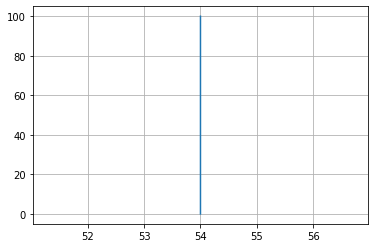

In [22]:
plt.grid();
plt.plot(dragc,tc[0:10000]);

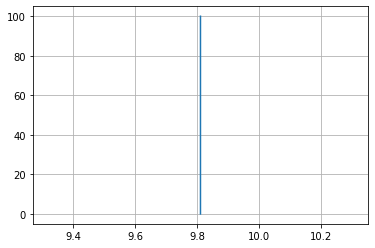

In [23]:
plt.grid();
plt.plot(grc,tc[0:10000]);